In [1]:
# Libraries for easy visualization and manipulation of data
import numpy as np
import pandas as pd

# Function for the support vector classification
from sklearn.svm import SVC

# Functions for splitting the data training & testing datasets & for checking the accuracy of our predictions
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Library to plot the confusion matrix for our predictions
import matplotlib.pyplot as plt

In [2]:
# Function to convert the list consisting of the actual and predicted labels into a proper matrix format
def matrix(y_test, pred):
    
    # Combining the lists consisting the actual & predicted class labels 
    val = pd.concat([y_test, pred], axis = 1)
    val.columns = ['Actual', 'Predicted']
    
    # Counting the values of each element of the matrix
    grp = val.groupby(['Actual', 'Predicted'])
    count = grp.apply(lambda x: len(x))

    indexes = count.index.to_frame(index = False)

    count.index = np.arange(count.shape[0])

    count = pd.concat([indexes, count], axis = 1)
    count.columns = ['Actual', 'Predicted', 'Count']

    # Coverting the dataframe into a matrix
    mat = count.pivot(index = 'Actual', columns = 'Predicted', values = 'Count')
    mat.fillna(0, inplace = True)
    
    return mat

In [3]:
# Function to plot the confusion matrix
def show_plot(mat):
    
    # Designing the visual of the confusion matrix
    fig, ax = plt.subplots(figsize = (7, 7))
    ax.matshow(mat, cmap = plt.cm.Greens, alpha = 0.3)

    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            ax.text(x = j, 
                    y = i, 
                    s = int(mat.values[i, j]), 
                    va = 'center', 
                    ha = 'center', 
                    size = 'xx-large')

    ax.xaxis.set_ticks(np.arange(mat.shape[1])) 
    ax.yaxis.set_ticks(np.arange(mat.shape[0]))

    # Assigning the labels & the title for the matrix
    ax.xaxis.set_ticklabels([str(int(x)) for x in mat.columns]) 
    ax.yaxis.set_ticklabels([str(int(x)) for x in mat.index])

    plt.xlabel('Predictions', fontsize = 18)
    plt.ylabel('Actuals', fontsize = 18)
    
    plt.title('Confusion Matrix', fontsize = 18)

    # Putting the matrix on the output screen
    plt.show()

In [11]:
# Reading the data from a csv file & converting it to a dataframe
df = pd.read_csv('covtype.csv', skiprows = lambda x: x % 20 != 0)
cols_lst = df.columns

# Seperating the features from the class labels
x = df[cols_lst[0:14]]
y = df[cols_lst[-1]]

# Normalizing the data so that no one feature has more impact on the calculations than the others
minmaxscale = lambda x: (x - x.min()) / (x.max() - x.min())
x_normalized = x.apply(minmaxscale)

# Spliting the data into traning & testing datasets  
x_train, x_test, y_train, y_test = train_test_split(x_normalized, y, test_size = 0.3, random_state = 30)

Accuracy: 0.725530694205393


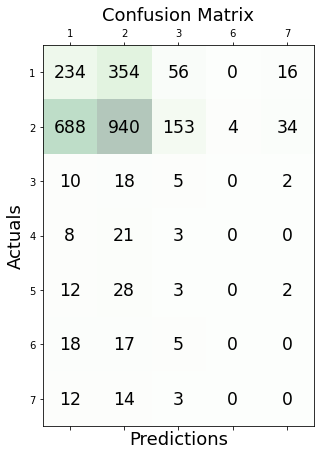

In [12]:
# Calling the function for the sv classifier
sv = SVC(kernel = 'poly', decision_function_shape = 'ovr')
sv.fit(x_train, y_train)

# Predicting the class labels for the testing data using the sv classifier
pred = sv.predict(x_test)
pred = pd.Series(pred)

# Checking the accuracy of our predictions
print('Accuracy:', accuracy_score(y_test, pred))

# Plotting the confusion matrix for the predicted class labels
mat = matrix(y_test, pred)
show_plot(mat)